# COVID-19 Case Study 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df1 = pd.read_csv('/content/drive/My Drive/dataset/covid dataset/AgeGroupDetails.csv')
df2 = pd.read_csv('/content/drive/My Drive/dataset/covid dataset/HospitalBedsIndia.csv')
df3 = pd.read_csv('/content/drive/My Drive/dataset/covid dataset/ICMRTestingDetails.csv')
df4 = pd.read_csv('/content/drive/My Drive/dataset/covid dataset/IndividualDetails.csv')
df5 = pd.read_csv('/content/drive/My Drive/dataset/covid dataset/ICMRTestingLabs.csv')
df6 = pd.read_csv('/content/drive/My Drive/dataset/covid dataset/covid_19_india.csv')

### [COVID-19 pandemic lockdown in India](https://en.wikipedia.org/wiki/COVID-19_pandemic_lockdown_in_India#Phase_1_(25_March_%E2%80%93_14_April))

- **The Covid-19 pandemic lockdowns started from 25 March – 14 April**
- **The goal of lockdowns was to slow the spread of the virus so that the Government has enough time to prepare itself for handling the increasing number of CoronaVirus cases.The Government was able to increase the number of HealthCare Institutes, beds available for treatment, etc**

<img src='https://image.cnbcfm.com/api/v1/image/106451928-1584626557121flatteningthecurve740px.png?v=1584626602&w=1600&h=900'>

# EDA

## 1) AGE GROUP DETAILS

In [4]:
df1.drop('Sno', axis=1, inplace=True)

In [5]:
# Changing Percentage Data Type to Numerical type

df1['Percentage'] = df1['Percentage'].apply(lambda X:float(X[:-1]))

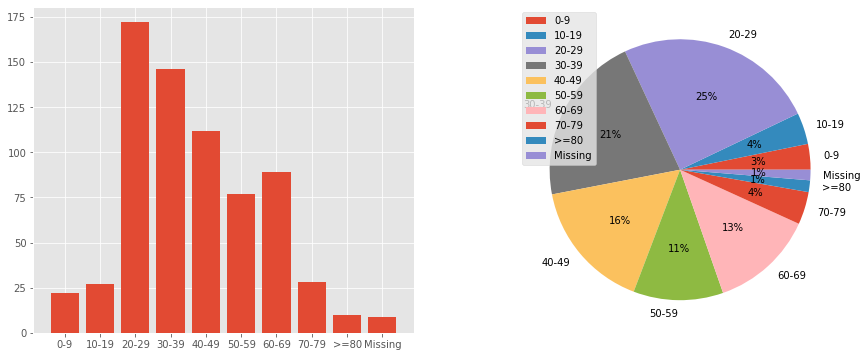

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax = ax.flatten()

ax[0].bar(x=df1['AgeGroup'], height=df1['TotalCases']);

ax[1].pie(x=df1['Percentage'],labels=df1['AgeGroup'], autopct='%1.0f%%');
ax[1].legend();

**Observations**
- **The Age Group 20-29 has the most Number of Case followed by Age Group 30-39, and 40-49**
- **The Non working Population i.e people below Age 20, and above Age 70 are not affected that much**
- **The working population i.e people in age between 20-70 seem to be affected mostly, which is bad because, this may cause the virus to spread rapidly as working people travel in congested trains, buses etc, which is also the way the virus spreads mostly, from person to person through small droplets from the nose or mouth which are spread when a person with COVID-19 coughs or exhales**

## 2) Hospital Beds in India


In [7]:
# Dropping the Sr.No column
# Dropping the Unnamed : 12 and Unnamed : 13 columns which consists of all Null values
# Dropping the columns with repeated information

df2.drop(['Sno', 'Unnamed: 12', 'Unnamed: 13', 'NumPrimaryHealthCenters_HMIS',
          'NumCommunityHealthCenters_HMIS', 'NumSubDistrictHospitals_HMIS',
          'NumDistrictHospitals_HMIS'], axis=1, inplace=True)

In [8]:
# Drop all entry where all columns are null
df2.dropna(how='all', inplace=True)
df2.drop(index=36, inplace=True)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   State/UT                          36 non-null     object 
 1   TotalPublicHealthFacilities_HMIS  36 non-null     object 
 2   NumPublicBeds_HMIS                36 non-null     object 
 3   NumRuralHospitals_NHP18           36 non-null     float64
 4   NumRuralBeds_NHP18                36 non-null     float64
 5   NumUrbanHospitals_NHP18           36 non-null     float64
 6   NumUrbanBeds_NHP18                36 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.2+ KB


In [10]:
df2.isnull().sum()

State/UT                            0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
dtype: int64

In [11]:
# Adding all the beds available
df2['Total Beds'] = df2['NumPublicBeds_HMIS'].astype('int') + df2['NumRuralBeds_NHP18'].astype('int') + df2['NumUrbanBeds_NHP18']
df2.drop(['NumPublicBeds_HMIS', 'NumRuralBeds_NHP18', 'NumUrbanBeds_NHP18'], axis=1, inplace=True)

# Adding all the Hospitals
df2['Total Hospitals'] = df2['NumRuralHospitals_NHP18'] + df2['NumUrbanHospitals_NHP18']
df2.drop(['NumRuralHospitals_NHP18', 'NumUrbanHospitals_NHP18'], axis=1, inplace=True)

In [12]:
# Changing the object type to numerical type
for column in df2.columns[1:]:
    df2[column] = df2[column].astype('int')

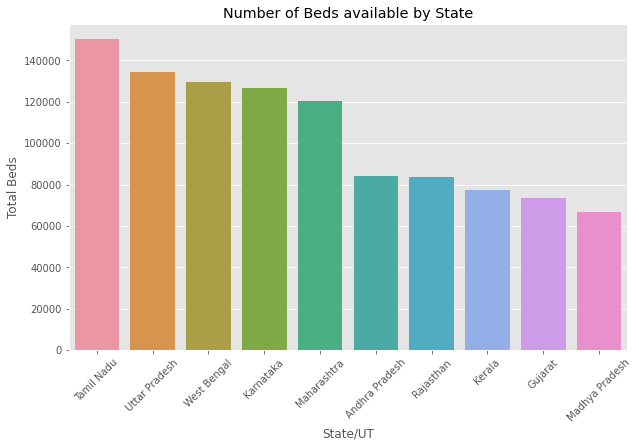

In [13]:
temp_df = df2.sort_values(by='Total Beds', ascending=False)[:10]

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

sns.barplot(x='State/UT', y='Total Beds', data=temp_df);
plt.title('Number of Beds available by State');

**Observations**
- **We can see that Tamil Nadu has the highest number of Beds available, followed by Uttar Pradesh & Karnataka**
- **Maharastra is ranked 5th in Number of availablity of Beds, but has the most number of Cases, this may cause a lot of people not receiving a proper treatment incase they get infected**

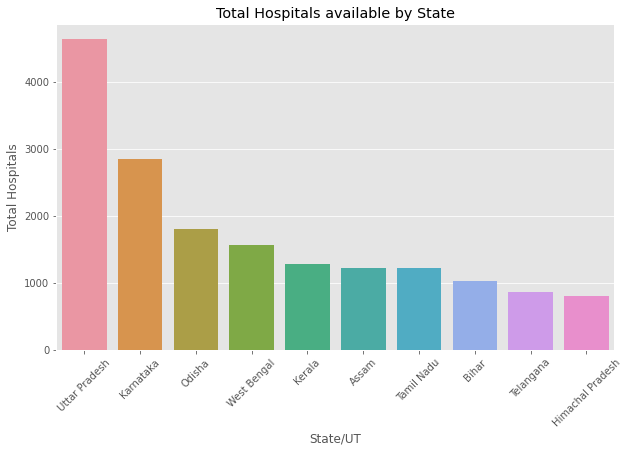

In [14]:
temp_df = df2.sort_values(by='Total Hospitals', ascending=False)[:10]

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

sns.barplot(x='State/UT', y='Total Hospitals', data=temp_df);

plt.title('Total Hospitals available by State');

**Observations**
- **Uttar Pradesh has the highest number of Hospitals, followed by Karnataka and Odhisha**
- **Maharashtra isn't even in the top 10 in Number of Hospitals**

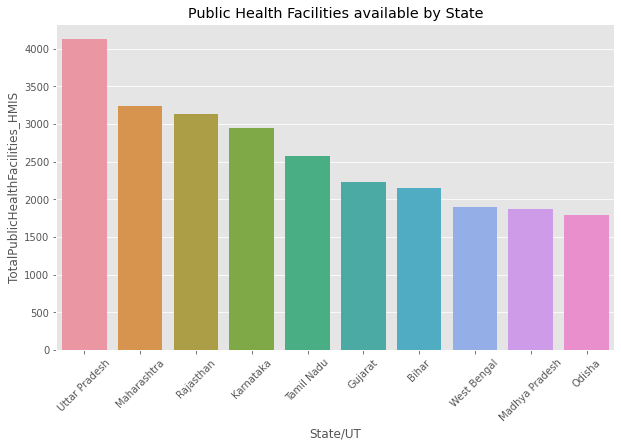

In [15]:
temp_df = df2.sort_values(by='TotalPublicHealthFacilities_HMIS', ascending=False)[:10]

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

sns.barplot(x='State/UT', y='TotalPublicHealthFacilities_HMIS', data=temp_df);

plt.title('Public Health Facilities available by State');

**Observations**
- **Uttar Pradesh has the highest number of Public Health Care centres, followed by Maharashtra and Rajasthan**

In [16]:
df3.drop(['Source', 'SNo'], axis=1, inplace=True)
df3.dropna(subset=['TotalPositiveCases'], inplace=True)

# Converting all the Dates from string to Datetime 
df3['DateTime'] = df3['DateTime'].apply(lambda X:X.split(' ')[0])
df3['DateTime'] = pd.to_datetime(df3['DateTime'], dayfirst=True)

In [17]:
df6.dropna(how='all', inplace=True)
df6.drop(['Sno', 'ConfirmedForeignNational', 'ConfirmedIndianNational', 'Time'], axis=1, inplace=True)
df6['Date'] = pd.to_datetime(df6['Date'], dayfirst=True)

## Number of Deaths by State

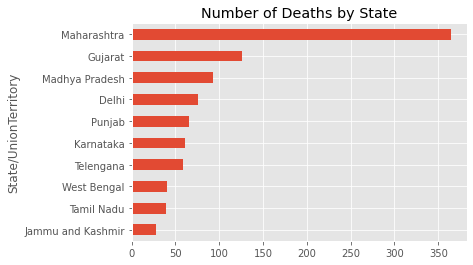

In [18]:
df6.groupby('State/UnionTerritory').agg('sum')['Deaths'].nlargest(10)[::-1].plot(kind='barh');
plt.title('Number of Deaths by State');

**Observations**
- **Maharashtra has highest number of Deaths, followed by Gujrat and Madhya Pradesh**
- **Maharashtra has far more deaths than any other state**

## Number of Cured people by State

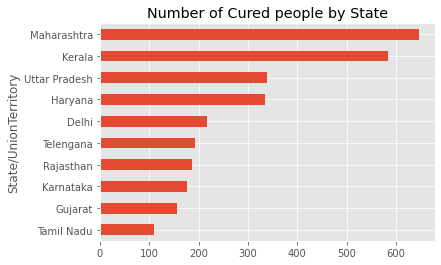

In [19]:
df6.groupby('State/UnionTerritory').agg('sum')['Cured'].nlargest(10)[::-1].plot(kind='barh');
plt.title('Number of Cured people by State');

**Observations**
- **Maharashtra has highest number of Cured people, followed by Kerala and Uttar Pradesh**

#jitendra

## Number of Confirmed Cases by State

Text(0.5, 1.0, 'Number of Confirmed Cases by State')

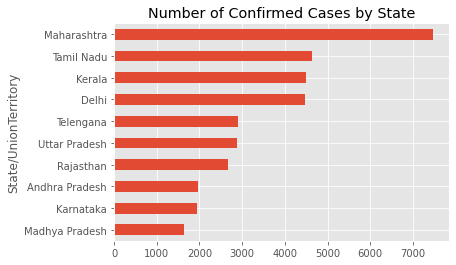

In [20]:
df6.groupby('State/UnionTerritory').agg('sum')['Confirmed'].nlargest(10)[::-1].plot(kind='barh');
plt.title('Number of Confirmed Cases by State')

**Observations**
- **Maharashtra has highest number of Confirmed Cases, followed by Tamil Nadu and Kerala**

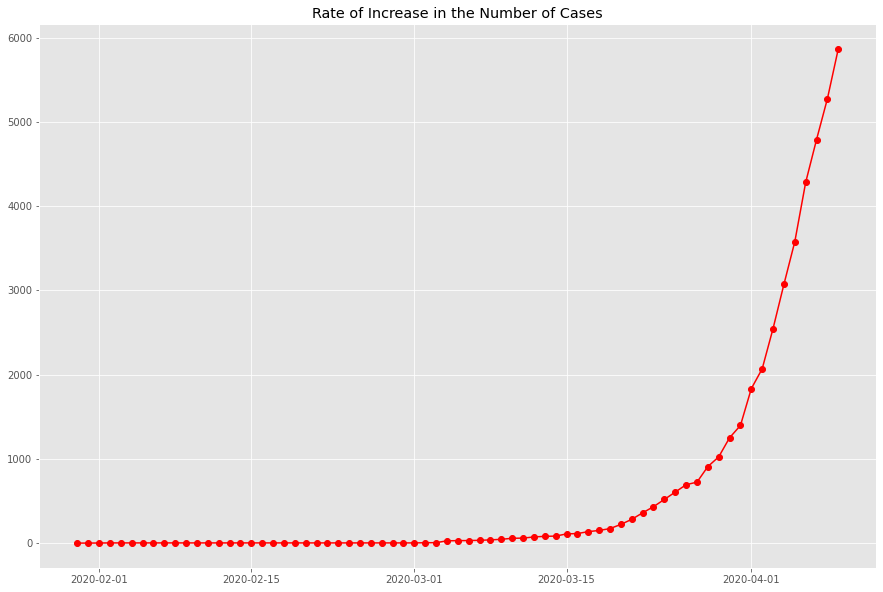

In [21]:
temp_df = df6.groupby('Date')['Confirmed'].agg('sum').to_frame().reset_index()

plt.figure(figsize= (15,10))

plt.plot_date(x=temp_df['Date'], y=temp_df['Confirmed'], linestyle ='-',color = 'r');
plt.title('Rate of Increase in the Number of Cases');

**Observations**
- **We can see that at first, the rate is almost flat but at the start of April we can see that there is an exponential increase in the Number of confirmed cases**
- **The virus spreads from person to person, so the exponential increase in the number of cases makes sense because as more people get the virus, they go out and spread it more people**
- **Similar trend is observed across all the other countries, flat line in the beginning and then an exponential increase in the number of cases**

<img src='https://specials-images.forbesimg.com/imageserve/5e77873810380d0006fbbfef/960x0.jpg?fit=scale'>

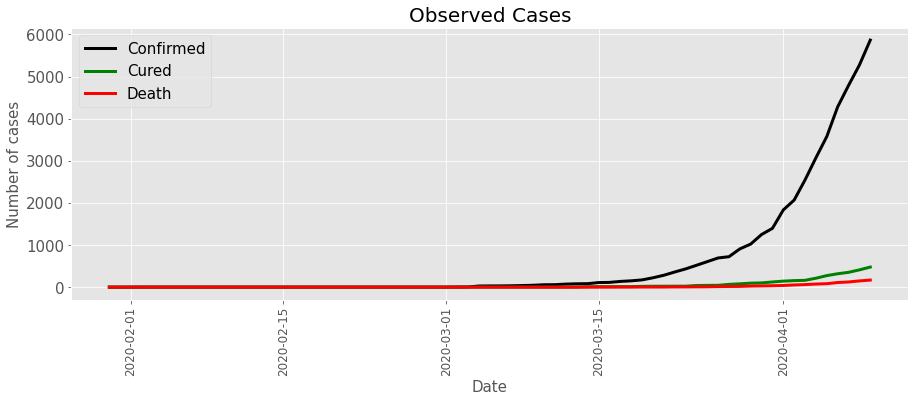

In [22]:
temp_df2 = df6.groupby('Date')[['Cured','Deaths','Confirmed']].sum()

plt.figure(figsize=(15,5))
plt.title('Observed Cases',fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Number of cases',fontsize=15)
plt.plot(temp_df2.index,temp_df2['Confirmed'],linewidth=3,label='Confirmed',color='black')
plt.plot(temp_df2.index,temp_df2['Cured'],linewidth=3,label='Cured',color='green')
plt.plot(temp_df2.index,temp_df2['Deaths'],linewidth=3,label='Death',color='red')
plt.legend(fontsize=15);

**Even though the number of cases increases very rapidly, the Death Rate remains, almost constant**

## Confirmed Cases by Gender

Text(0.5, 1.0, '')

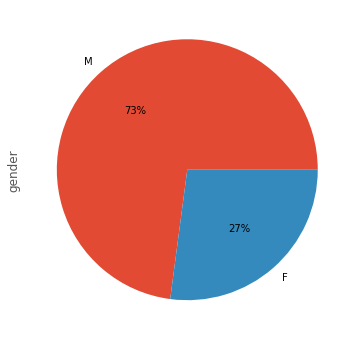

In [23]:
df4.drop(['id', 'diagnosed_date', 'nationality','detected_city', 'status_change_date',
          'notes', 'current_status', 'diagnosed_date', 
          'government_id', 'detected_state', 'age'], axis=1, inplace=True)

plt.figure(figsize=(10, 6))
df4['gender'].value_counts().plot(kind='pie', autopct='%1.0f%%', );
plt.title('')

**Observations**
- **73% of the total affected cases are Male, 27% are female**

## Number of Confirmed Cases by City

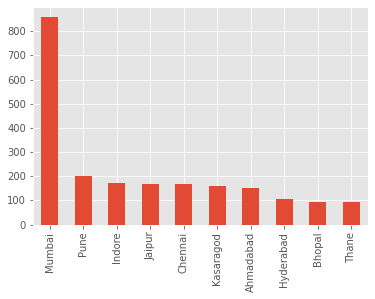

In [24]:
df4['detected_district'].value_counts()[:10].plot(kind='bar');

**Observations**
- **Mumbai has the highest number of cases**
- **Mumbai is also the financial capital of Maharashtra, so such high number of cases is very concerning for the Economy of our country**
- **We can also observe that there are more number cases in the Densly populated cities such as Mumbai, Pune, Indore, Chennai**
- **Villages which have considerably low population dont seem to have high number of cases**

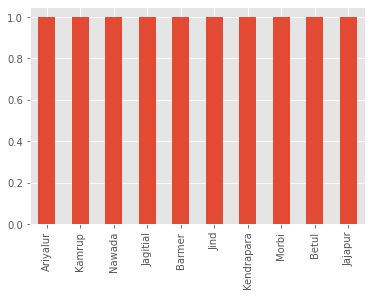

In [25]:
df4['detected_district'].value_counts()[::-1][:10].plot(kind='bar');

**Observations**
- **Cities with low Population density, and villages dont seem to have high number of cases**

## Number of People Tested for the Virus by days

Text(0.5, 1.0, 'Rate of Testing')

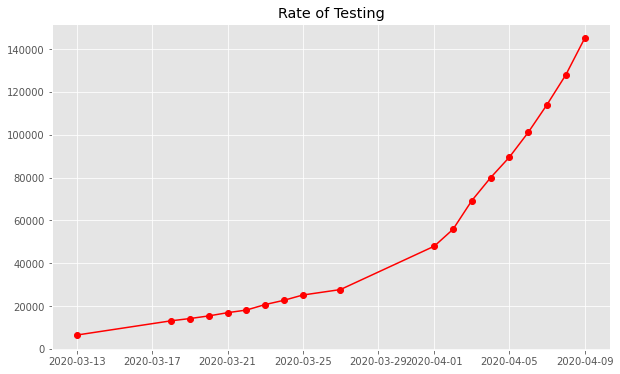

In [26]:
plt.figure(figsize=(10, 6))
plt.plot_date(x=df3['DateTime'], y=df3['TotalSamplesTested'], linestyle ='-',color = 'r');
plt.title('Rate of Testing')

**Observations**
- **We can also see an increase in the number of Testings as the Days increase, which is good as more people are tested, we can diagnose them earlier, thus preventing them from spreading the virus to other people thus decreasing the rate of spread of the virus**

#vaibhav

# Modelling Steps

#### 1) We observed earlier an expoential increase in the number cases with increase in number of days, so we will use Polynomial Regression to plot the rate of increase in the number of cases
#### 2) We will consider the Confirmed cases  recorded during the lockdown days as our training data
#### 3) Using polynomial regression we will try to predict the rate of increase in number of Confirmed cases for the next 31 days and try to compare it with original data using an API
#### 4) We will compare the predicted values with the original data to see if we are correctly able to plot the increase in the number of cases after lockdown
#### 5) After we will compare the average of confirmed cases recorded before lockdowns and after lockdowns to see if the 21 day lockdown had any affect reducing the spread of the virus

In [27]:
# Seperating features & Target variables

X = temp_df['Date']
y = temp_df['Confirmed']

# Creating Days column as Dates cannot be used for polynomial regression
Days = np.arange(1, len(temp_df)+1)

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Using polynomial regression of degree 4 to fit to our training data 
poly_features = PolynomialFeatures(degree=4)

In [29]:
poly_Days = poly_features.fit_transform(Days.reshape(-1, 1))

In [30]:
y

0        1.0
1        1.0
2        2.0
3        3.0
4        3.0
       ...  
66    3577.0
67    4281.0
68    4789.0
69    5274.0
70    5865.0
Name: Confirmed, Length: 71, dtype: float64

In [31]:
poly_reg = LinearRegression()
poly_reg.fit(poly_Days, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
poly_reg.score(poly_Days,y)

0.9900671807528597

**High R2 score means the regression curve is perfectly able to plot the trend in increase in the number of cases**

In [33]:
y_predicted = poly_reg.predict(poly_Days)

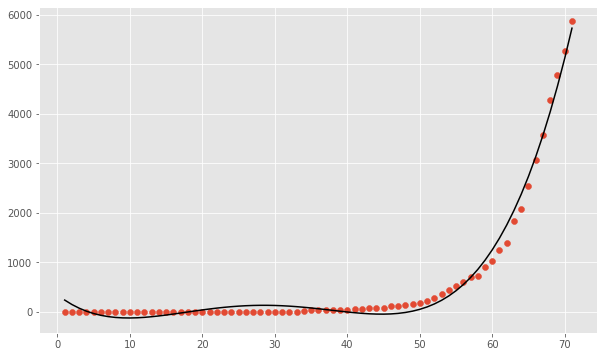

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(Days,y)

plt.plot(Days, y_predicted , color='k')

plt.show()

**Observations**
- **The red dots represent the actual rate of increase in the number of confirmed cases**
- **The black line represents the values suggested by the Polynomial Regression**
- **We can see that our model correctly able to plot the increase in the rate of confirmed cases**
- **We will use the model to plot the trend for next 31 days after lockdowns, to see if there is an change in the rate of Confirmed cases**

In [35]:
# Adding the days column to our Dataframe
temp_df['Days'] = Days

# Adding the values till april 14
dates_till_lockdown = pd.DataFrame(pd.date_range(start='2020-04-10', end='2020-04-14'),
                                    columns=['Date'])

temp_df = temp_df.append(dates_till_lockdown, 'sort=False')

# Adding number of days
temp_df.loc[temp_df['Date'] > '2020-04-09', 'Days'] = [i for i in range(72, 72+len(temp_df.loc[temp_df['Date'] > '2020-04-09']))]

# Predicting the number of confirmed cases for the missing data till 14th April
poly_Days2 = poly_features.fit_transform(temp_df.loc[temp_df['Date'] > '2020-04-09']['Days'].values.reshape(-1, 1))

# Predicted number of cases
y_predicted_2 = poly_reg.predict(poly_Days2)

temp_df.loc[temp_df['Date'] > '2020-04-09', 'Confirmed'] = y_predicted_2.round()

In [36]:
temp_df

,Date,Confirmed,Days
0,2020-01-30,1.0,1.0
1,2020-01-31,1.0,2.0
2,2020-02-01,2.0,3.0
3,2020-02-02,3.0,4.0
4,2020-02-03,3.0,5.0
...,...,...,...
71,2020-04-10,6387.0,72.0
72,2020-04-11,7097.0,73.0
73,2020-04-12,7861.0,74.0
74,2020-04-13,8682.0,75.0


In [37]:
# Creating a Dataframe of the Dates for the next 31 days
new_dates = pd.DataFrame(pd.date_range(start='2020-04-15', end='2020-05-15'), columns=['Date'])
new_dates.head(5)

,Date
0,2020-04-15
1,2020-04-16
2,2020-04-17
3,2020-04-18
4,2020-04-19


In [38]:
# Converting Dates into number of Days passed 
new_dates['Days'] = pd.Series([i for i in range(77, 77+len(new_dates))])

# Setting number of confirmed cases to 0
new_dates['Confirmed'] = 0

In [39]:
# Feature transforming days 
poly_Days3 = poly_features.fit_transform(new_dates['Days'].values.reshape(-1, 1))

In [40]:
y_predicted_3 = poly_reg.predict(poly_Days3)

In [41]:
new_dates['Confirmed'] = y_predicted_3.round()

#deven

In [42]:
# Cases on Start day of lockdowns

temp_df[temp_df['Date'] == '2020-03-25']

,Date,Confirmed,Days
55,2020-03-25,606.0,56.0


In [43]:
# Cases on end day of lockdowns

temp_df['Confirmed'].tail(1)

75    9562.0
Name: Confirmed, dtype: float64

In [44]:
# increase_in_nunber_of_cases during lockdowns

9562-433

9129

In [45]:
# Average increase in number of cases per day during lockdowns

round(9129/21)

435

In [46]:
# Cases on first day after lockdowns 

new_dates['Confirmed'].head(1)

0    10505.0
Name: Confirmed, dtype: float64

In [47]:
# CAses after 30 days

new_dates['Confirmed'].tail(1)

30    83097.0
Name: Confirmed, dtype: float64

In [48]:
# increase in nunmber of cases after lockdowns

83097 - 10505

72592

In [49]:
# Average increase in number of cases per day after lockdowns

round(72592/31)

2342

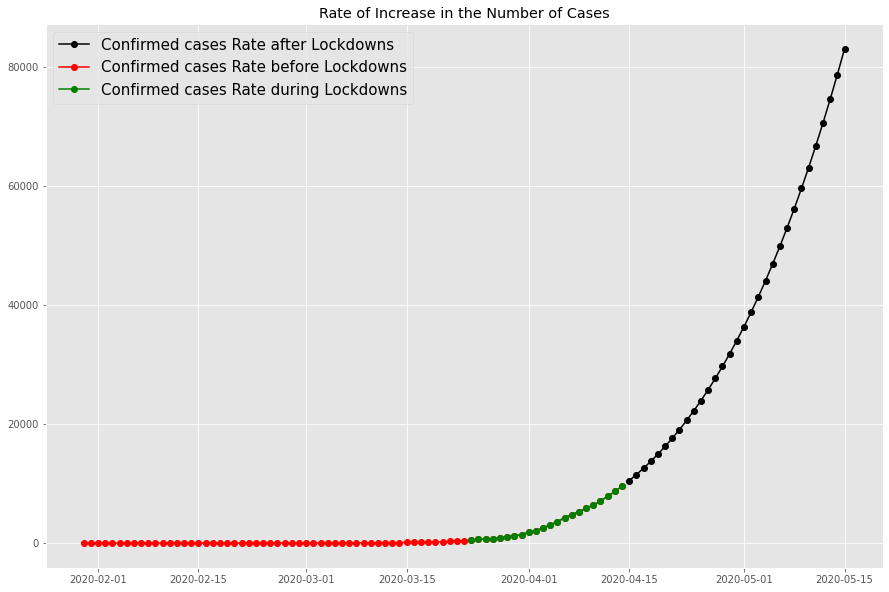

In [50]:
plt.figure(figsize= (15,10))

plt.plot_date(x=new_dates['Date'], y=new_dates['Confirmed'], linestyle ='-',color = 'black', label='Confirmed cases Rate after Lockdowns');
plt.plot_date(x=temp_df['Date'], y=temp_df['Confirmed'], linestyle ='-',color = 'r', label='Confirmed cases Rate before Lockdowns');
plt.plot_date(x=temp_df[temp_df['Date'] > '2020-03-23']['Date'], y=temp_df[temp_df['Date'] > '2020-03-23']['Confirmed'], linestyle ='-', color = 'g', label='Confirmed cases Rate during Lockdowns')
plt.title('Rate of Increase in the Number of Cases');
plt.legend(fontsize=15);

**Observations**
- **We see a more steeper curve for the rate of confirmed cases after the lockdowns ended, represented by the Black line**
- **During the lockdowns we observe a less steep curve, represented by green line**

**Conclusion**
- **After the lockdowns ended there were average of 2300 cases per day, during lockdowns the average cases per day were upto 400**

- **After the lockdowns ended there were 5 times more cases on average daily**

- **So this concludes that lockdowns were effective in slowing down the rate of spread of Coronavirus**